# Bottle of Wine Price Prediction by Group 12

Description: Let's try to predict the price of a bottle of wine based on a collection of over one hundred thousand reviews and other product features.

Evaluation: Root Mean Squared Error (RMSE).  
RMSE = sqrt (mean ((predicted-true) ^ 2))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# show all columns
pd.set_option('display.max_columns', None)

%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define scoring metric
def rmse_score(y_actual, y_predicted):
    return np.sqrt(np.mean(np.square(y_actual - y_predicted)))

In [3]:
# import train and test data.
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv", index_col='id')
target_df = train_df['price']

In [4]:
print(train_df.columns)
print(test_df.columns)

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'id'],
      dtype='object')
Index(['index', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


In [5]:
# drop id columns (not necessary)
train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["index"], inplace=True)

In [6]:
# Merge dataframe for data cleaning and preprocessing
all_df = pd.concat([train_df, test_df]).reset_index(drop=True)


In [7]:
# Column of train one more than test because of the price column
print("Train Dataframe shape: ", train_df.shape)
print("Test Dataframe shape: ", test_df.shape)
print("Combined Dataframe shape: ", all_df.shape)

Train Dataframe shape:  (175000, 13)
Test Dataframe shape:  (83210, 13)
Combined Dataframe shape:  (258210, 13)


In [8]:
all_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
country,Portugal,France,France,US,US,Spain,France,Italy,US,Italy
description,This is a fine rich balanced wine. It has ripe...,"A solid, chunky wine, with a structure that is...","This is powerful and concentrated, with the hi...","Rich, ripe and oaky, this Petite Sirah charms ...",This wine is a unique in the state blend and f...,This brut nature is citric and bubbly on the p...,"A ripe wine that has red-berry fruits, slices ...",From one of Sicily's most beautiful and promis...,This wine plays close to the edge of overripe-...,This basic Prosecco is perfectly quaffable tha...
designation,Vila Santa Reserva,NaN,NaN,Thompson Vineyard,McKinley Springs Vineyard,Brut Nature Reserva,Cuvée Prestige,Baccante,NaN,Lellè Extra Dry
points,88.8709,88.0417,94.085,89.8698,89.0177,83.1187,88.3205,85.1735,85.9087,81.9295
price,20,28,130,34,24,13,35,42,38,14
province,Alentejano,Bordeaux,Bordeaux,California,Washington,Catalonia,Bordeaux,Sicily & Sardinia,California,Veneto
region_1,NaN,Lalande de Pomerol,Saint-Émilion,Santa Barbara County,Horse Heaven Hills,Cava,Bordeaux Supérieur,Sicilia,Russian River Valley,Prosecco
region_2,NaN,NaN,NaN,Central Coast,Columbia Valley,NaN,NaN,NaN,Sonoma,NaN
taster_name,NaN,NaN,NaN,NaN,Sean P. Sullivan,Michael Schachner,Roger Voss,NaN,Virginie Boone,NaN
taster_twitter_handle,NaN,NaN,NaN,NaN,@wawinereport,@wineschach,@vossroger,NaN,@vboone,NaN


In [9]:
# Check if similar amount of null values in train and test columns
a = train_df.count()
b = test_df.count()
pd.DataFrame({"train_data (17500)": a, "test_data (83210)": b})

,train_data (17500),test_data (83210)
country,174953,83193
description,175000,83210
designation,122734,58386
points,175000,83210
price,175000,0
province,174953,83193
region_1,146466,69327
region_2,75394,35602
taster_name,65509,30970
taster_twitter_handle,62190,29369


In [10]:
# Check data types
train_df.info(),  test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 13 columns):
country                  174953 non-null object
description              175000 non-null object
designation              122734 non-null object
points                   175000 non-null float64
price                    175000 non-null float64
province                 174953 non-null object
region_1                 146466 non-null object
region_2                 75394 non-null object
taster_name              65509 non-null object
taster_twitter_handle    62190 non-null object
title                    82189 non-null object
variety                  174999 non-null object
winery                   175000 non-null object
dtypes: float64(2), object(11)
memory usage: 17.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 83210 entries, 0 to 83209
Data columns (total 13 columns):
country                  83193 non-null object
description              83210 non-null object
designatio

(None, None)

Observations: Only one numeric predictor; Many columns with null values

In [11]:
# % of  NULL values
null_values = [all_df[x].isnull().sum() *100/258210 for x in all_df.drop(columns=["price"]).columns ]
pd.DataFrame(null_values, index=all_df.drop(columns=["price"]).columns, columns=["% Null Values in Data Set"])

,% Null Values in Data Set
country,0.024786
description,0.000000
designation,29.855544
points,0.000000
province,0.024786
region_1,16.427327
region_2,57.013284
taster_name,62.635452
taster_twitter_handle,64.540878
title,53.148600


Observation: Designation, regions, tasters, title have sparse vectors

In [12]:
train_df.describe()

,points,price
count,175000.000000,175000.000000
mean,88.083987,34.304400
std,3.157001,38.398146
min,79.636128,4.000000
25%,85.971283,16.000000
50%,87.981631,25.000000
75%,90.085631,40.000000
max,100.220603,2500.000000


Observation: Points range from 79 to 100(approx), with a mean of 88. Price has a large range and probably skewed

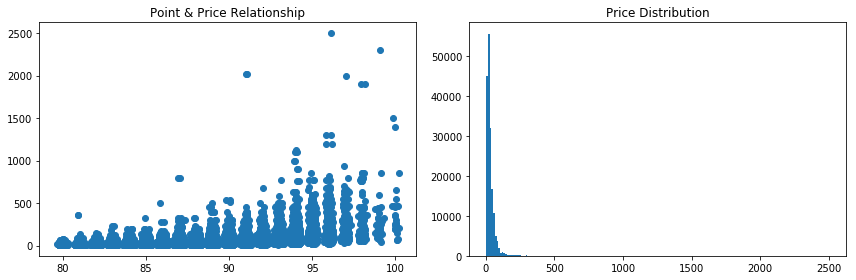

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(train_df['points'], train_df['price'])
ax[1].hist(train_df['price'], bins=200)

ax[0].set_title("Point & Price Relationship")
ax[1].set_title("Price Distribution")

plt.tight_layout()

In [14]:
all_df.describe()

,points,price
count,258210.000000,175000.000000
mean,88.084734,34.304400
std,3.157554,38.398146
min,79.636128,4.000000
25%,85.969390,16.000000
50%,87.981722,25.000000
75%,90.088168,40.000000
max,100.220603,2500.000000


In [15]:
print(all_df[['points', 'price']].corr())

          points     price
points  1.000000  0.443276
price   0.443276  1.000000


In [16]:
#del train_df['price']

### Imputation / Dealing with null values

Missing: **Variety**  
Missing variety can be found in title

In [17]:
all_df[all_df['variety'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
86403,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,88.046742,17.0,Maipo Valley,NaN,NaN,NaN,NaN,Carmen 1999 (Maipo Valley),NaN,Carmen


In [18]:
variety = train_df[(train_df['province'] == 'Maipo Valley') & (train_df['winery'] == 'Carmen')]['variety'].mode()[0]
print(variety)

all_df['variety'][86403] = variety

CABERNET SAUVIGNON


Missing: **Designation**  
Information of 'designation' is contained in 'title'

In [19]:
all_df[['title', 'designation', 'region_1']][5:15]

,title,designation,region_1
5,Mas Fi NV Brut Nature Reserva Sparkling (Cava),Brut Nature Reserva,Cava
6,Château Tayet 2014 Cuvée Prestige (Bordeaux S...,Cuvée Prestige,Bordeaux Supérieur
7,NaN,Baccante,Sicilia
8,Matrix 2013 Pinot Noir (Russian River Valley),NaN,Russian River Valley
9,NaN,Lellè Extra Dry,Prosecco
10,Domaine d'Eole 2005 Réserve des Gardians Red (...,Réserve des Gardians,Coteaux d'Aix-en-Provence
11,NaN,NaN,NaN
12,NaN,Thauvenay,Sancerre
13,NaN,Vin d'Eliza,Paso Robles
14,Goat Bubbles 2011 Sierra Madre Vineyard Créman...,Sierra Madre Vineyard Crémant,Santa Maria Valley


In [20]:
import re

Missing: **Region 1**

In [21]:
all_df['region_1'].sort_values()

72489     Abruzzo
25966     Abruzzo
55290     Abruzzo
103236    Abruzzo
3977      Abruzzo
           ...   
258194        NaN
258195        NaN
258196        NaN
258199        NaN
258202        NaN
Name: region_1, Length: 258210, dtype: object

In [22]:
all_df[['region_1', 'title']].head(10)

,region_1,title
0,NaN,NaN
1,Lalande de Pomerol,NaN
2,Saint-Émilion,NaN
3,Santa Barbara County,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...
4,Horse Heaven Hills,Syncline 2016 McKinley Springs Vineyard Rosé (...
5,Cava,Mas Fi NV Brut Nature Reserva Sparkling (Cava)
6,Bordeaux Supérieur,Château Tayet 2014 Cuvée Prestige (Bordeaux S...
7,Sicilia,NaN
8,Russian River Valley,Matrix 2013 Pinot Noir (Russian River Valley)
9,Prosecco,NaN


In [23]:
# Extract region from title
def get_regions(string):
    if type(string) is str:
        try:
            detached_string = re.search(r'\((.*?)\)', string).group(1).strip()
            return detached_string
        except:
            return np.nan
    else: return np.nan
all_df["temp_region"]= all_df["title"].apply(get_regions)

print("Number of NA values in region before imputation:", all_df["region_1"].isna().sum() )

Number of NA values in region before imputation: 42417


In [24]:
# Replace empty regions with extracted regions
all_df.region_1.fillna(all_df.temp_region, inplace=True)

del all_df['temp_region']

#Check number after fillna
print("Number of NA values in region after imputation:", all_df["region_1"].isna().sum() )

Number of NA values in region after imputation: 23236


Observation: About 50% drop in NA values

In [25]:
all_df['region_1'].value_counts()

Napa Valley                       10666
Columbia Valley (WA)               9050
Russian River Valley               6627
California                         6087
Mendoza                            5831
                                  ...  
Waitaki Valley                        1
Todi                                  1
Paso Robles Highlands District        1
Kathikas                              1
Dolenjska                             1
Name: region_1, Length: 1672, dtype: int64

### Feature Engineering

### Points

Source: https://towardsdatascience.com/wine-ratings-prediction-using-machine-learning-ce259832b321  
https://towardsdatascience.com/predicting-wine-quality-using-text-reviews-8bddaeb5285d  
Range of Points is 79 to 101  
1 -> Points 80 to 82 (Acceptable wines)  
2 -> Points 83 to 86 (Good wines)  
3 -> Points 87 to 89 (Very Good wines)  
4 -> Points 90 to 93 (Excellent wines)  
5 -> Points 94 to 101 (Superb wines)  

In [26]:
def choose_points(point):
    if   point >= 94: return 5
    elif point >= 90: return 4
    elif point >= 87: return 3
    elif point >= 83: return 2
    else: return 1

all_df['ratings'] = all_df['points'].apply(choose_points)

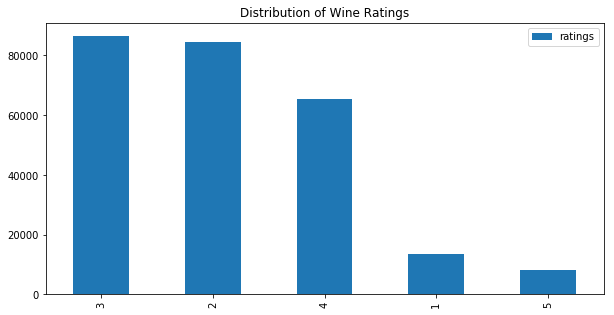

In [27]:
all_df['ratings'].value_counts().to_frame().plot(kind='bar', 
                                                 figsize=(10,5),
                                                    title="Distribution of Wine Ratings")

Observation: Imbalanced data cos some ratings have low data

### Countries

In [28]:
# Data Source from Statistics Times
#df_countries = pd.read_html('http://statisticstimes.com/geography/countries-by-continents.php')

# convert countries into regions
#country_region = pd.concat([df_countries[i] for i in np.arange(2, 8)])

# country_region.to_csv('country_region')
country_region = pd.read_csv('country_region.csv', index_col='Country/Territory' )
country_region['Region'][100:200]

Country/Territory
Oman                        Western Asia
Qatar                       Western Asia
Saudi Arabia                Western Asia
State of Palestine          Western Asia
Syrian Arab Republic        Western Asia
                              ...       
Nicaragua                Central America
Panama                   Central America
Bermuda                 Northern America
Canada                  Northern America
Greenland               Northern America
Name: Region, Length: 100, dtype: object

In [29]:
def region(country):
    return country_region.loc[country]['Region']

all_df['country'].fillna(value='None', inplace=True)
all_df['country_region'] = all_df['country'].map(region)

all_df['country'].replace({'None':np.nan}, inplace=True)
all_df['country_region'].replace({'None':np.nan}, inplace=True)

In [30]:
all_df['country_region'].value_counts()

Northern America             116852
Southern Europe               61194
Western Europe                42337
South America                 19807
Australia and New Zealand     11636
Southern Africa                3530
Western Asia                   1482
Eastern Europe                 1023
Central America                 133
Northern Europe                  85
Northern Africa                  40
Southern Asia                    17
Eastern Asia                     10
Name: country_region, dtype: int64

In [31]:
price_per_region = all_df.groupby('country_region').mean()['price'].to_frame().reset_index()
price_per_country = all_df.groupby('country').mean()['price'].to_frame().reset_index()

Text(0, 0.5, 'Price')

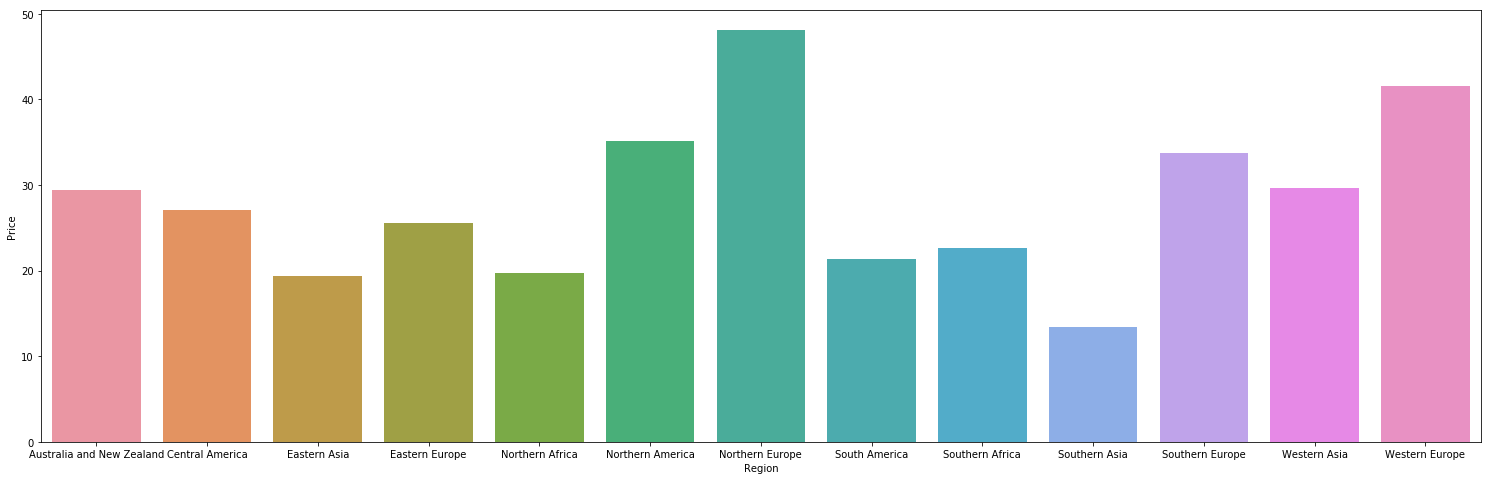

In [32]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot("country_region", "price", data=price_per_region, ax=ax)

ax.set_xlabel('Region')
ax.set_ylabel('Price')


Observation: On average, Northern europe and Western wines are more expensive

### Tasters

Text(0, 0.5, 'Ratings')

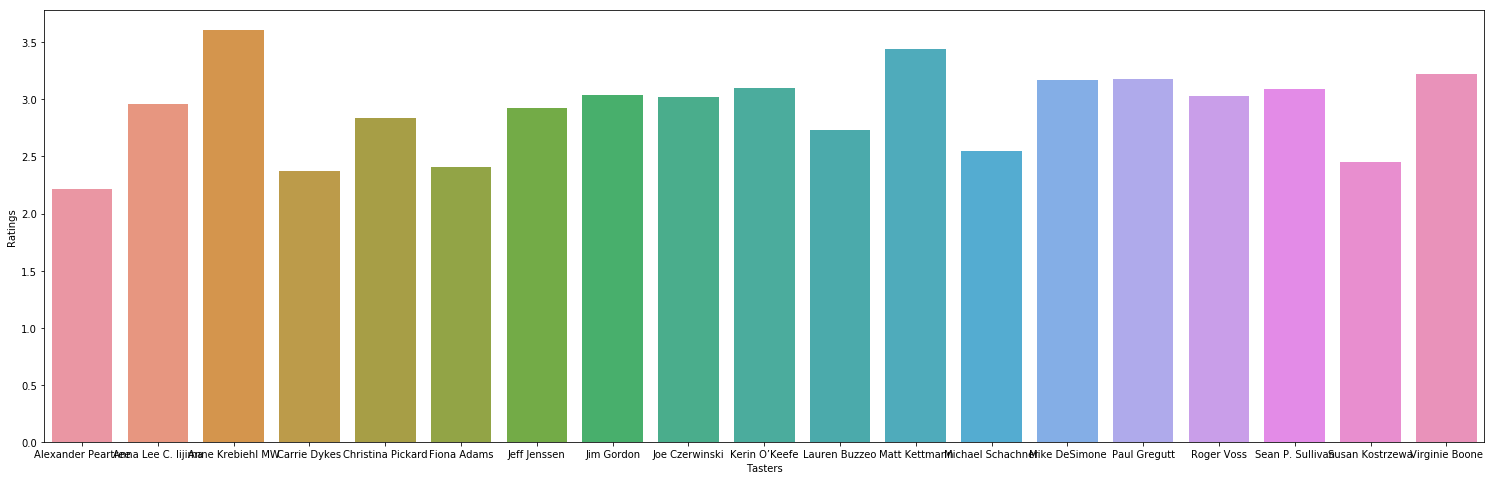

In [33]:
tasters = all_df.groupby('taster_name').mean()['ratings'].to_frame().reset_index()

fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot("taster_name", "ratings", data=tasters, ax=ax)

ax.set_xlabel('Tasters')
ax.set_ylabel('Ratings')

Observation: Not much bias in their ratings

### Twitter Handle

In [34]:
# Create column to check if user has twitter handle
all_df['has_twit_handle'] = all_df['taster_twitter_handle'].notnull()

# Convert bool to numeric
all_df['has_twit_handle'] = all_df['has_twit_handle'].astype(int)

In [35]:
# Drop twitter handle column
del all_df["taster_twitter_handle"]

In [36]:
all_df['has_twit_handle'].head()

0    0
1    0
2    0
3    0
4    1
Name: has_twit_handle, dtype: int64

### Title

In [37]:
# Extract year from title
all_df['title'].fillna(value='None', inplace=True)

def extract_year(string):
    if type(string) is str:
        digit = [int(s) for s in string.split() if s.isdigit()]
        if digit and len(str(digit[0])) == 4:
            return digit[0]
        else: return np.nan
    return np.nan

all_df['title_year'] = all_df['title'].apply(extract_year)
all_df['title_year'] = all_df['title'].apply(extract_year)

all_df['title'].replace({'None':np.nan}, inplace=True)

In [38]:
all_df['title_year'].head()

0       NaN
1       NaN
2       NaN
3    2010.0
4    2016.0
Name: title_year, dtype: float64

In [39]:
train_df = all_df[ :175000 ]
test_df = all_df[175000: ]

In [40]:
# !pip install category_encoders
import category_encoders as ce

# https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
encoder = ce.TargetEncoder(cols=['designation', 'province',
        'region_1', 'region_2', 'taster_name', 'title',
        'variety', 'winery', 'country', 'country_region', 'title_year'])
encoder.fit(train_df, target_df)
train_df_enc = encoder.transform(train_df)
test_df_enc = encoder.transform(test_df)

In [41]:
train_df_enc.head().T

,0,1,2,3,4
country,26.0605,43.3673,43.3673,35.1531,35.1531
description,This is a fine rich balanced wine. It has ripe...,"A solid, chunky wine, with a structure that is...","This is powerful and concentrated, with the hi...","Rich, ripe and oaky, this Petite Sirah charms ...",This wine is a unique in the state blend and f...
designation,20.0354,28.6454,28.6454,36.6122,28.7273
points,88.8709,88.0417,94.085,89.8698,89.0177
price,20,28,130,34,24
province,22.4616,40.652,40.652,37.2681,30.9779
region_1,25.6488,32.2576,67.7313,29.604,31.3036
region_2,33.4931,33.4931,33.4931,33.6418,31.3066
taster_name,33.8917,33.8917,33.8917,33.8917,34.2159
title,33.3159,33.3159,33.3159,34.3044,26.7713


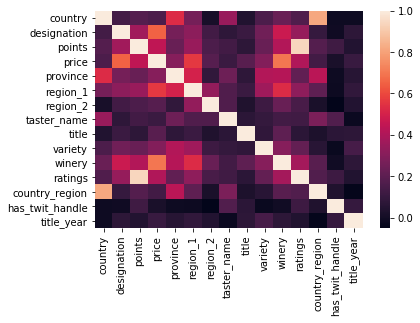

In [42]:
sns.heatmap(train_df_enc.corr())

In [43]:
all_df = pd.concat([train_df_enc, test_df_enc]).reset_index(drop=True)

In [44]:
all_df.shape

(258210, 16)

In [45]:
# Find number of words in each description. Naive
all_df['n_words'] = all_df['description'].apply(lambda x: len(x.split()))
all_df['n_chars'] = all_df['description'].apply(lambda x: len(x))

### Create Polynomial Interactions

In [46]:
all_df_num = ['designation', 'points', 'province', 'region_1', 'region_2',
       'taster_name', 'title', 'variety', 'winery', 'ratings',
       'country_region', 'has_twit_handle', 'title_year', 'n_words',
       'n_chars']

In [47]:
# Create feature interactions among numerical variables
num_col_len = len(all_df_num)
for i in range(num_col_len-1):
    col1 = all_df_num[i]
    for j in range(i+1, num_col_len):
        col2 = all_df_num[j]
        all_df[f"{col1}_{col2}"] = all_df[col1]*all_df[col2]

In [48]:
all_df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'title',
       ...
       'country_region_has_twit_handle', 'country_region_title_year',
       'country_region_n_words', 'country_region_n_chars',
       'has_twit_handle_title_year', 'has_twit_handle_n_words',
       'has_twit_handle_n_chars', 'title_year_n_words', 'title_year_n_chars',
       'n_words_n_chars'],
      dtype='object', length=123)

### Description

In [49]:
from sklearn.feature_extraction import text

In [50]:
all_df['description'].head()

0    This is a fine rich balanced wine. It has ripe...
1    A solid, chunky wine, with a structure that is...
2    This is powerful and concentrated, with the hi...
3    Rich, ripe and oaky, this Petite Sirah charms ...
4    This wine is a unique in the state blend and f...
Name: description, dtype: object

In [51]:
# Find most frequently occuring words and their count or percentage
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize

# set seaborn style 
sns.set(style="whitegrid")

stopwords = set(stopwords.words('english'))
# Detokenizer combines tokenized elements
detokenizer = TreebankWordDetokenizer()

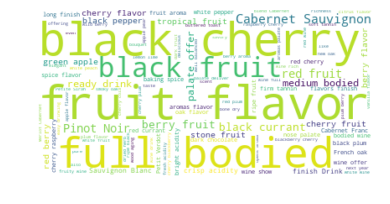

In [52]:
# Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(desc for desc in all_df.description)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=150, 
                      max_words=100, 
                      background_color="white",
                      stopwords=stopwords
                     ).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear', )
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("first_review.png", )

Text(0.5, 1.0, '% Occurrence of Most Frequent Words')

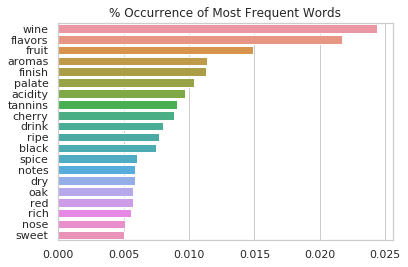

In [53]:
def clean_description(desc):
    desc = word_tokenize(desc.lower())
    desc = [token for token in desc if token not in stopwords and token.isalpha()]
    return detokenizer.detokenize(desc)

cleaned_description = all_df["description"].apply(clean_description)

word_occurrence = cleaned_description.str.split(expand=True).stack().value_counts()

total_words = sum(word_occurrence)

# plot most common words 

top_words = word_occurrence[:20]/total_words

ax = sns.barplot(x = top_words.values, y = top_words.index)

# Setting title 
ax.set_title("% Occurrence of Most Frequent Words")

Observation: Wine and flavors are the most occuring words in the corpus of description

In [54]:
import string
from nltk.tokenize import sent_tokenize, word_tokenize
def tokenize(text):
    """
    sent_tokenize(): segment text into sentences
    word_tokenize(): break sentences into words
    """
    try: 
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
        text = regex.sub(" ", text) # remove punctuation
        
        tokens_ = [word_tokenize(s) for s in sent_tokenize(text)]
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent
        tokens = list(filter(lambda t: t.lower() not in stopwords, tokens))
        filtered_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        filtered_tokens = [w.lower() for w in filtered_tokens if len(w)>=3]
        
        return filtered_tokens
            
    except TypeError as e: print(text,e)

TD-idf

In [55]:
# Convert text to bag of words
from sklearn.feature_extraction import text
bow_transform = text.CountVectorizer(stop_words=stopwords, 
                                     max_df=0.8, 
                                     min_df=7, 
                                     max_features=500,
                                     tokenizer=tokenize,
                                     ngram_range=(1, 2)
                                    )
all_desc = np.append(train_df['description'].values, test_df['description'].values)
all_bow = bow_transform.fit_transform(all_desc)
len(bow_transform.vocabulary_)

500

In [56]:
print("Total extracted words:", all_bow.shape)

Total extracted words: (258210, 500)


In [57]:
tfidf_trfm = text.TfidfTransformer()
tfidf = tfidf_trfm.fit_transform(all_bow)

In [58]:
new_cols = bow_transform.get_feature_names()
print("1st 10 Extracted words:", new_cols[0:10])

1st 10 Extracted words: ['accented', 'accents', 'acid', 'acidic', 'acidity', 'acids', 'add', 'adds', 'aftertaste', 'age']


Observation: These are very common words in wine parlance so they are generic in the domain

In [59]:
df_desc = pd.DataFrame(tfidf.toarray(), columns=new_cols)

In [60]:
df_desc.shape

(258210, 500)

In [61]:
del all_df['price']
del all_df['description']

# Rename some columns cos of conflict with  words columns
all_df.rename(columns = {"winery": "winery_col", 
                     "variety":"variety_col"}, 
                                 inplace = True)

# Split into train and test
train_df_desc = pd.DataFrame(tfidf[0:175000].toarray(), columns=new_cols)
test_df_desc = pd.DataFrame(tfidf[175000: ].toarray(), columns=new_cols)


train_df = all_df[ :175000 ]
test_df = all_df[175000: ]

# Combine dataframe
train_df = train_df.join(train_df_desc)
test_df = test_df.join(test_df_desc)

train_df.shape, test_df.shape

((175000, 621), (83210, 621))

In [62]:
# Save data from model
# Saving to pickle file  
#train_df_concat.to_pickle("tf_data/train_df.pkl")
#test_df_concat.to_pickle("tf_data/test_df.pkl")
#target_df.to_pickle("tf_data/target_df.pkl")

In [63]:
# To unpiclke
# train_df = pd.read_pickle("data/train_df.pkl")
# test_df = pd.read_pickle("data/test_df.pkl")
# target_df = pd.read_pickle("data/target_df.pkl")

### Modelling

### XGBoost

In [64]:
#Import libraries:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV #Perforing grid search
from sklearn import metrics   #metrics

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

SEED = 27
X = train_df.copy()
test_X = test_df.copy()
y = target_df
predictors = train_df.columns

In [65]:
def modelfit(alg, predictors, X_train=X, y_train=y, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='rmse', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
        
        print("n_estimators: ", cvresult.shape[0])
    # Fit the algorithm on the data
    alg.fit(X_train, y_train, eval_metric='rmse')

    # Predict training set:
    Xtrain_predictions = alg.predict(X_train)
    
    # Print model report:
    print("\nModel Report")
    print("R2 Score : %.4g" % metrics.r2_score(
                                                y_train.values, Xtrain_predictions))
    rmse = 2*np.sqrt(metrics.mean_squared_error(y_train, Xtrain_predictions))
    print("RMSE Score (Train): %f" % rmse)
    
    print(cvresult.tail())
    
    xgb.plot_importance(alg, max_num_features=20, height=0.8)

**Base Mode**

n_estimators:  144

Model Report
R2 Score : 0.9625
RMSE Score (Train): 14.867174
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
139         7.174341        0.123135       16.149332       2.447838
140         7.154867        0.129320       16.145970       2.447022
141         7.144521        0.129031       16.144515       2.447590
142         7.133233        0.132083       16.142841       2.447342
143         7.112941        0.132951       16.139673       2.449082


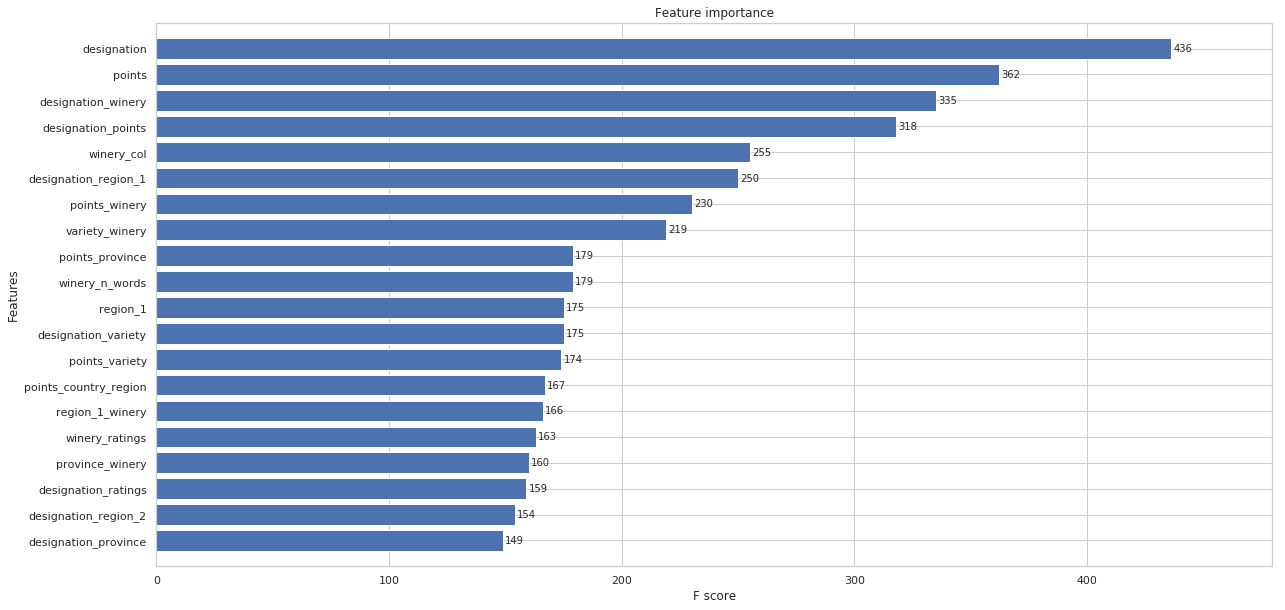

In [66]:
xgb0 = XGBRegressor(
    learning_rate=0.2,
    n_estimators=144,
    max_depth=9,
    min_child_weight=3,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    early_stopping_rounds=10,
    eval_metric= 'rmse',
    n_jobs=-1,
    scale_pos_weight=1,
    silent=True,
    seed=SEED)
modelfit(xgb0, predictors=predictors)

Observation: Best predictors are designation, points and combinations of them.

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
type(y_val)

pandas.core.series.Series

In [69]:
X_train.shape, y_train.values.reshape(-1,1).shape

((140000, 621), (140000, 1))

In [70]:
xgb1 = XGBRegressor(
    learning_rate=0.2,
    n_estimators=144,
    max_depth=9,
    min_child_weight=3,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.7,
    objective='reg:squarederror',
    n_jobs=-1,
    scale_pos_weight=1,
    silent=True,
    seed=SEED)
eval_set = [(X_val, y_val)]
xgb1.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set, early_stopping_rounds=10, verbose=True)

[0]	validation_0-rmse:40.4268
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:33.8925
[2]	validation_0-rmse:28.9471
[3]	validation_0-rmse:25.1615
[4]	validation_0-rmse:22.2996
[5]	validation_0-rmse:20.2613
[6]	validation_0-rmse:18.5048
[7]	validation_0-rmse:17.3545
[8]	validation_0-rmse:16.446
[9]	validation_0-rmse:15.9132
[10]	validation_0-rmse:15.5215
[11]	validation_0-rmse:15.1952
[12]	validation_0-rmse:15.0409
[13]	validation_0-rmse:14.8715
[14]	validation_0-rmse:14.7306
[15]	validation_0-rmse:14.7074
[16]	validation_0-rmse:14.7598
[17]	validation_0-rmse:14.7227
[18]	validation_0-rmse:14.7217
[19]	validation_0-rmse:14.7019
[20]	validation_0-rmse:14.7214
[21]	validation_0-rmse:14.7155
[22]	validation_0-rmse:14.7432
[23]	validation_0-rmse:14.8043
[24]	validation_0-rmse:14.8404
[25]	validation_0-rmse:14.8931
[26]	validation_0-rmse:14.9011
[27]	validation_0-rmse:14.9104
[28]	validation_0-rmse:14.9797
[29]	validation_0-rmse:14.9586
Stopping. Best i

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       importance_type='gain', learning_rate=0.2, max_delta_step=0,
       max_depth=9, min_child_weight=3, missing=None, n_estimators=144,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8, verbosity=1)

In [71]:
test_label = xgb1.predict(test_X, ntree_limit=xgb1.best_iteration)
print(test_label)

[82.97932  44.66226  48.15766  ... 40.190815 26.222685 32.95784 ]


In [72]:
# Small script to generate submission file
import random
def submit(test_label, test_df, file="submission_.csv"):
    test_price = test_label
    print("Fist 10 predictions:", test_price[:10])

    test_id = test_df.index
    data = {'id': test_id,
    'price': test_price
           }

    frame = pd.DataFrame(data)
    path = f'submissions/{file}'
    print("\nSaved path :", path)
    frame.to_csv(path, index = False)

### Thank You  
### Merci